***Uso de Árvore de Decisão para classificar ocorrências de problemas glicêmicos***

**Importações das bibliotecas básicas**

In [0]:
import pandas as pd

**Leitura da base de dados**

In [0]:
df = pd.read_csv('diabetes.csv')

In [60]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


**Verificando se o df possui valores nulos**

In [61]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Divindo o df em features e labels**

In [0]:
features = df.iloc[:,0:8].values

In [63]:
features.shape

(2000, 8)

In [0]:
labels = df.iloc[:,8].values

In [65]:
labels.shape

(2000,)

**Dividindo o df em treino e teste**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_teste, y_train, y_teste = train_test_split(features,labels, test_size = 0.25, random_state = 0)

**Importação da Árvore de Decisão**

In [0]:
from sklearn.tree import DecisionTreeClassifier

**Criação do modelo**

In [0]:
model_ad = DecisionTreeClassifier()

In [70]:
model_ad.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Visualização do modelo**

In [0]:
from sklearn.tree import export

In [0]:
export.export_graphviz(model_ad,
                       out_file = 'arvore_decision.png',
                       feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI',
                                        'DiabetesPedigreeFunction','Age'],
                       class_names = ['1', '0'],
                       leaves_parallel=True)

In [0]:
from sklearn import tree

[Text(175.93143310546876, 210.192, 'X[1] <= 137.5\ngini = 0.452\nsamples = 1500\nvalue = [982, 518]'),
 Text(89.2377685546875, 195.696, 'X[7] <= 28.5\ngini = 0.34\nsamples = 1071\nvalue = [838, 233]'),
 Text(56.2359375, 181.2, 'X[5] <= 45.4\ngini = 0.191\nsamples = 597\nvalue = [533, 64]'),
 Text(41.85, 166.704, 'X[1] <= 124.5\ngini = 0.17\nsamples = 586\nvalue = [531, 55]'),
 Text(20.925, 152.208, 'X[5] <= 31.4\ngini = 0.113\nsamples = 497\nvalue = [467, 30]'),
 Text(10.4625, 137.712, 'X[0] <= 7.5\ngini = 0.014\nsamples = 278\nvalue = [276, 2]'),
 Text(7.846875000000001, 123.216, 'X[6] <= 0.672\ngini = 0.007\nsamples = 277\nvalue = [276, 1]'),
 Text(5.23125, 108.72, 'gini = 0.0\nsamples = 244\nvalue = [244, 0]'),
 Text(10.4625, 108.72, 'X[6] <= 0.686\ngini = 0.059\nsamples = 33\nvalue = [32, 1]'),
 Text(7.846875000000001, 94.22399999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(13.078125, 94.22399999999999, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(13.078125, 123

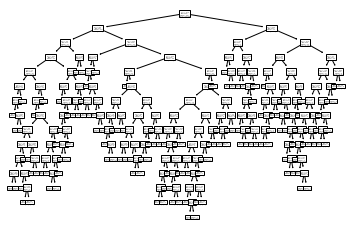

In [78]:
tree.plot_tree(model_ad)

**Avaliação do modelo**

In [0]:
previsoes = model_ad.predict(X_teste)

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [0]:
precisao_model = accuracy_score(y_teste,previsoes)
matriz = confusion_matrix(y_teste,previsoes)

In [84]:
precisao_model

0.98

In [85]:
matriz

array([[324,  10],
       [  0, 166]])